#Import library awal

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Reading Data

In [2]:
raw = pd.read_csv('dataset/bank-additional-full.csv', sep=";")
# raw = pd.read_csv('bank-additional-full.csv', sep=";")
raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#Modifikasi Fitur

### CHECK DATASET

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### CHANGE TO CATEGORICAL OR NUMERICAL
*   numeric = age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
*   categoric = job, marital, education, housing, loan, contact, month, day_of_week, poutcome, 

In [4]:
c = ['job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']

for col in c:
  raw[col] = raw[col].astype('category')

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

###CHECK FOR UNIQUE VALUE COUNTS

In [5]:
raw.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

###DROP pdays, previous, poutcome & duration*
*duration dihilangkan untuk mendapatkan model yang prediktif

In [6]:
raw.drop('pdays', axis=1, inplace=True)
raw.drop('previous', axis=1, inplace=True)
raw.drop('poutcome', axis=1, inplace=True)
raw.drop('duration', axis=1, inplace=True)

In [7]:
raw.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  campaign        41188 non-null  int64   
 11  emp.var.rate    41188 non-null  float64 
 12  cons.price.idx  41188 non-null  float64 
 13  cons.conf.idx   41188 non-null  float64 
 14  euribor3m       41188 non-null  float64 
 15  nr.employed     41188 non-null  float64 
 16  y               41188 non-null  category
dtypes: category(

###CHECK VALUE COUNT
untuk mendapatkan data unkown

In [9]:
for (cname, cdata) in raw.iteritems():
  print(raw[cname].value_counts(),"\n")

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64 

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

no         

##DISTRIBUSI DATA

###AGE

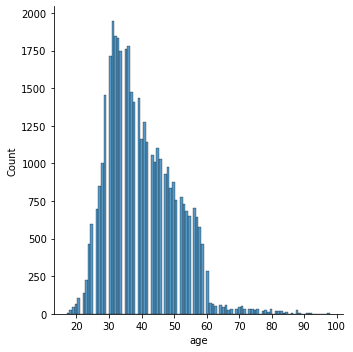

In [10]:
sns.displot(raw['age'], bins=100)

Menghapus data dengan umur 76 keatas

In [11]:
raw = raw[raw['age'] < 65]

###Job

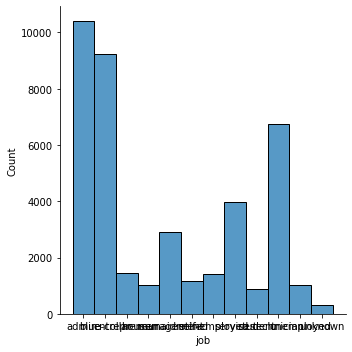

In [12]:
sns.displot(raw['job'], bins=100)

###Marital Status

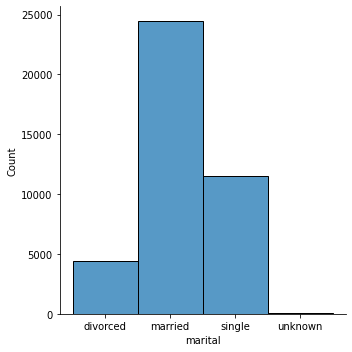

In [13]:
sns.displot(raw['marital'], bins=100)

In [14]:
raw[raw['marital'] == "unknown"]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40,58,management,unknown,university.degree,no,yes,no,telephone,may,mon,1,1.1,93.994,-36.4,4.857,5191.0,no
390,59,retired,unknown,university.degree,unknown,no,no,telephone,may,tue,1,1.1,93.994,-36.4,4.857,5191.0,no
413,57,retired,unknown,basic.4y,no,no,no,telephone,may,tue,1,1.1,93.994,-36.4,4.857,5191.0,no
1493,33,services,unknown,high.school,no,yes,yes,telephone,may,thu,2,1.1,93.994,-36.4,4.855,5191.0,no
1608,32,unknown,unknown,university.degree,no,no,no,telephone,may,fri,4,1.1,93.994,-36.4,4.855,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38550,31,entrepreneur,unknown,university.degree,no,no,no,cellular,oct,thu,1,-3.4,92.431,-26.9,0.722,5017.5,yes
38579,31,entrepreneur,unknown,university.degree,no,yes,no,telephone,oct,thu,4,-3.4,92.431,-26.9,0.722,5017.5,no
39322,30,technician,unknown,university.degree,no,no,no,cellular,mar,mon,2,-1.8,93.369,-34.8,0.639,5008.7,yes
39323,30,technician,unknown,university.degree,no,no,no,cellular,mar,mon,2,-1.8,93.369,-34.8,0.639,5008.7,yes


###Education

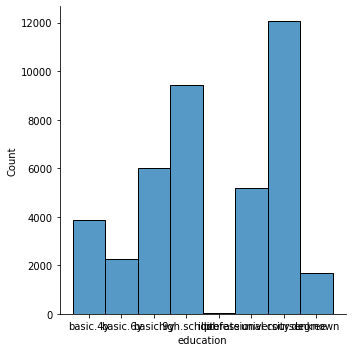

In [15]:
sns.displot(raw['education'], bins=100)

In [16]:
raw['education'].value_counts()

university.degree      12068
high.school             9451
basic.9y                6013
professional.course     5172
basic.4y                3868
basic.6y                2273
unknown                 1663
illiterate                17
Name: education, dtype: int64

###Default

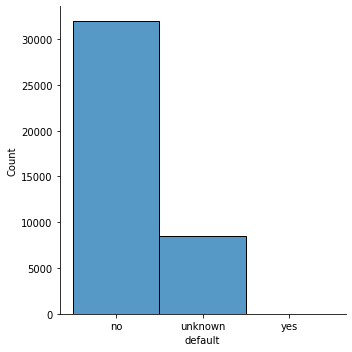

In [17]:
sns.displot(raw['default'], bins=100)

###Loan

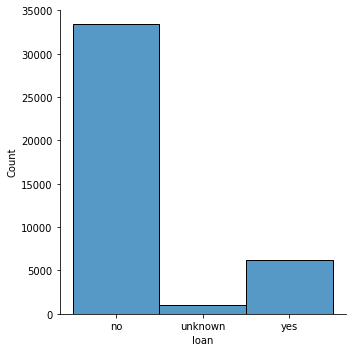

In [18]:
sns.displot(raw['loan'], bins=100)

###Contact

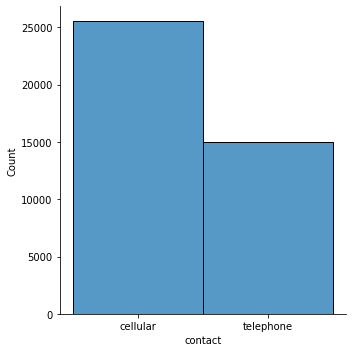

In [19]:
sns.displot(raw['contact'], bins=100)

###Month & Day

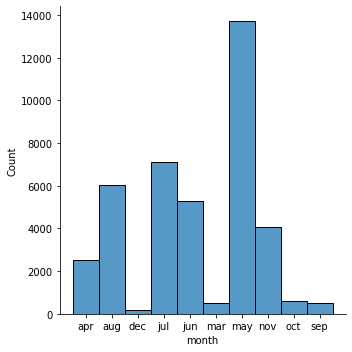

In [20]:
sns.displot(raw['month'], bins=100)

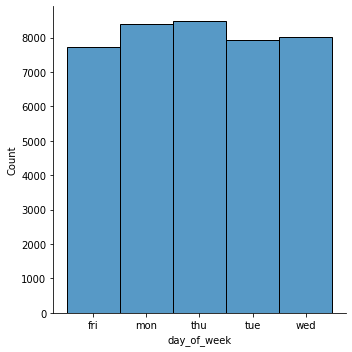

In [21]:
sns.displot(raw['day_of_week'], bins=100)

###Campaign

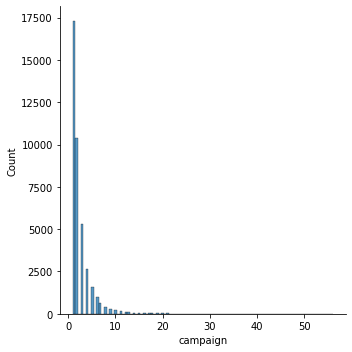

In [22]:
sns.displot(raw['campaign'], bins=100)

Menghapus data dengan campaign < 20

In [23]:
raw = raw[raw['campaign'] < 20]

###emp.var.rate

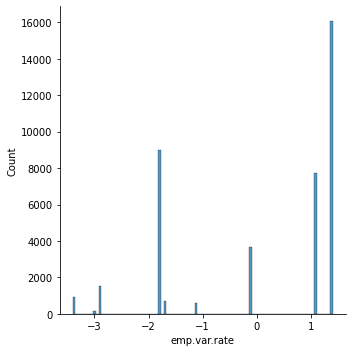

In [24]:
sns.displot(raw['emp.var.rate'], bins=100)

In [25]:
raw['emp.var.rate'].value_counts()

 1.4    16072
-1.8     8980
 1.1     7740
-0.1     3683
-2.9     1552
-3.4      901
-1.7      685
-1.1      570
-3.0      146
-0.2       10
Name: emp.var.rate, dtype: int64

Transformasi emp.var.rate ke dalam skala [0, 1]

In [26]:
from sklearn.preprocessing import MinMaxScaler
a = raw['emp.var.rate'].min()
b = raw['emp.var.rate'].max()
ab = (raw['emp.var.rate']-a)/(b-a)
ab.value_counts()

1.000000    16072
0.333333     8980
0.937500     7740
0.687500     3683
0.104167     1552
0.000000      901
0.354167      685
0.479167      570
0.083333      146
0.666667       10
Name: emp.var.rate, dtype: int64

In [27]:
raw['emp.var.rate'] = ab

###cons.price.idx

In [28]:
raw['cons.price.idx'].value_counts()

93.994    7740
93.918    6599
92.893    5778
93.444    5168
94.465    4305
93.200    3616
93.075    2393
92.963     702
92.201     675
92.431     372
92.649     306
94.199     270
94.215     268
92.843     248
93.369     238
92.379     223
94.055     211
94.027     206
93.876     182
94.601     175
92.469     175
92.713     146
93.749     141
94.767     125
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

Transformasi cons.price.idx ke dalam skala [0, 1]



In [29]:
a = raw['cons.price.idx'].min()
b = raw['cons.price.idx'].max()
ab = (raw['cons.price.idx']-a)/(b-a)
raw['cons.price.idx'] = ab

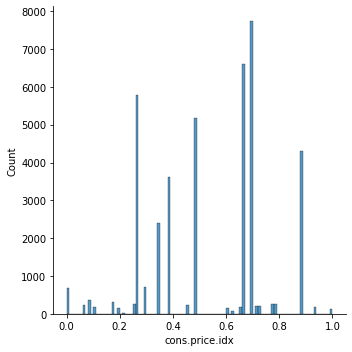

In [30]:
sns.displot(raw['cons.price.idx'], bins=100)

###cons.conf.idx

In [31]:
raw['cons.conf.idx'].value_counts()

-36.4    7740
-42.7    6599
-46.2    5778
-36.1    5168
-41.8    4305
-42.0    3616
-47.1    2393
-40.8     702
-31.4     675
-26.9     372
-30.1     306
-37.5     270
-40.3     268
-50.0     248
-34.8     238
-29.8     223
-39.8     211
-38.3     206
-40.0     182
-49.5     175
-33.6     175
-33.0     146
-34.6     141
-50.8     125
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

Transformasi cons.price.idx ke dalam skala [0, 1]

In [32]:
a = raw['cons.conf.idx'].min()
b = raw['cons.conf.idx'].max()
ab = (raw['cons.conf.idx']-a)/(b-a)
raw['cons.conf.idx'] = ab

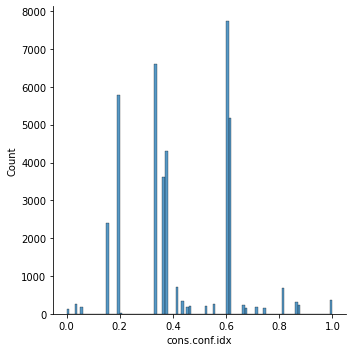

In [33]:
sns.displot(raw['cons.conf.idx'], bins=100)

###Euribor3M

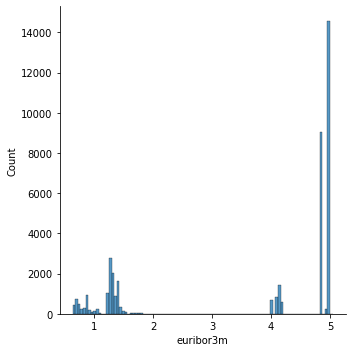

In [34]:
sns.displot(raw['euribor3m'], bins=100)

In [35]:
raw['euribor3m'].value_counts()

4.857    2863
4.962    2589
4.963    2479
4.961    1884
4.856    1210
         ... 
3.816       1
3.053       1
1.574       1
0.969       1
1.045       1
Name: euribor3m, Length: 316, dtype: int64

Transformasi euribor3m ke dalam skala [0, 1]

In [36]:
a = raw['euribor3m'].min()
b = raw['euribor3m'].max()
ab = (raw['euribor3m']-a)/(b-a)
raw['euribor3m'] = ab

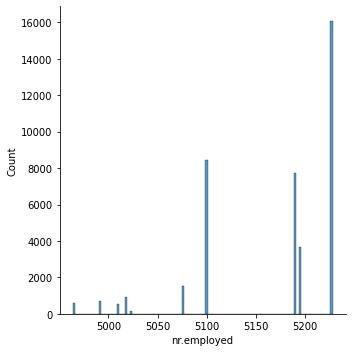

In [37]:
# nr.employed
sns.displot(raw['nr.employed'], bins=100)

In [38]:
raw['nr.employed'].value_counts()

5228.1    16072
5099.1     8419
5191.0     7740
5195.8     3683
5076.2     1552
5017.5      901
4991.6      685
4963.6      570
5008.7      561
5023.5      146
5176.3       10
Name: nr.employed, dtype: int64

In [39]:
a = raw['nr.employed'].min()
b = raw['nr.employed'].max()
ab = (raw['nr.employed']-a)/(b-a)
raw['nr.employed'] = ab

In [40]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40339 entries, 0 to 41186
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             40339 non-null  int64   
 1   job             40339 non-null  category
 2   marital         40339 non-null  category
 3   education       40339 non-null  category
 4   default         40339 non-null  category
 5   housing         40339 non-null  category
 6   loan            40339 non-null  category
 7   contact         40339 non-null  category
 8   month           40339 non-null  category
 9   day_of_week     40339 non-null  category
 10  campaign        40339 non-null  int64   
 11  emp.var.rate    40339 non-null  float64 
 12  cons.price.idx  40339 non-null  float64 
 13  cons.conf.idx   40339 non-null  float64 
 14  euribor3m       40339 non-null  float64 
 15  nr.employed     40339 non-null  float64 
 16  y               40339 non-null  category
dtypes: category(

###REVIEW

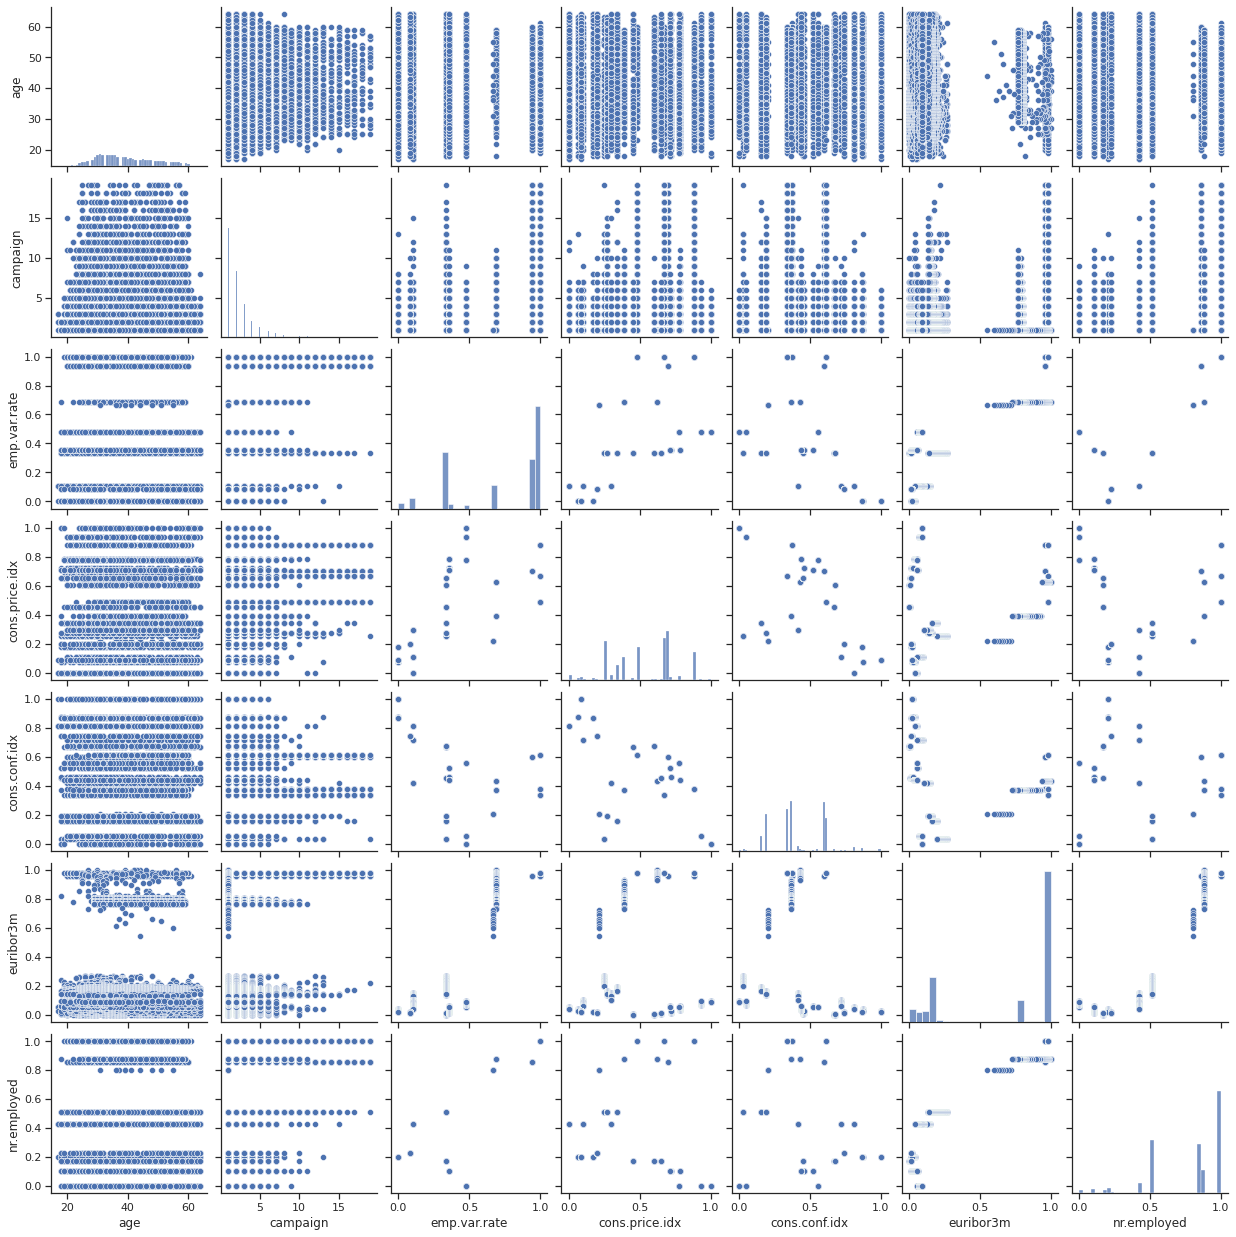

In [41]:
sns.set(style = 'ticks', color_codes=True)
sns.pairplot(data=raw, vars=['age','campaign','emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])

In [43]:
for (col, data) in raw.iteritems():
  print(raw[col].value_counts())
  print()

31    1939
32    1836
33    1830
36    1773
35    1749
34    1738
30    1702
37    1471
29    1448
39    1425
38    1400
41    1271
40    1153
42    1136
45    1101
43    1047
46    1026
44    1006
28    1001
48     976
47     923
50     872
27     847
49     836
52     774
51     753
53     724
56     697
26     696
54     679
55     646
57     643
25     592
58     571
24     462
59     461
60     283
23     226
22     137
21     102
61      73
20      65
62      62
64      57
63      55
19      42
18      28
17       5
Name: age, dtype: int64

admin.           10356
blue-collar       9208
technician        6708
services          3949
management        2897
entrepreneur      1444
self-employed     1410
retired           1150
housemaid         1016
unemployed        1007
student            875
unknown            319
Name: job, dtype: int64

married     24335
single      11494
divorced     4433
unknown        77
Name: marital, dtype: int64

university.degree      12023
high.school     

# Data Wrangling

##Encoding categorical

Import library untuk encoding

In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

###Job

In [46]:
raw['job'].value_counts()

admin.           10356
blue-collar       9208
technician        6708
services          3949
management        2897
entrepreneur      1444
self-employed     1410
retired           1150
housemaid         1016
unemployed        1007
student            875
unknown            319
Name: job, dtype: int64

Feature 'job' di-encoding dengan metode ordinal encoder

In [47]:
raw['job']= le.fit_transform(raw['job'])

In [48]:
raw['job'].value_counts()

0     10356
1      9208
9      6708
7      3949
4      2897
2      1444
6      1410
5      1150
3      1016
10     1007
8       875
11      319
Name: job, dtype: int64

###Marital status

In [49]:
raw['marital'].value_counts()

married     24335
single      11494
divorced     4433
unknown        77
Name: marital, dtype: int64

Feature 'marital' di-encoding dengan metode one-hot encoder

In [50]:
raw2 = pd.get_dummies(raw, columns=['marital'])
raw2.drop('marital_unknown', axis=1, inplace=True)
raw = raw2
raw.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single
0,56,3,basic.4y,no,no,no,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0
1,57,7,high.school,unknown,no,no,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0
2,37,7,high.school,no,yes,no,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0
3,40,0,basic.6y,no,no,no,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0
4,56,7,high.school,no,no,yes,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0


###Education

In [51]:
raw['education'].value_counts()

university.degree      12023
high.school             9407
basic.9y                5982
professional.course     5149
basic.4y                3836
basic.6y                2268
unknown                 1657
illiterate                17
Name: education, dtype: int64

Feature 'education' di-encoding dengan metode ordinal encoder

In [52]:
raw['education']= le.fit_transform(raw['education'])

In [53]:
raw['education'].value_counts()

6    12023
3     9407
2     5982
5     5149
0     3836
1     2268
7     1657
4       17
Name: education, dtype: int64

###Default

In [54]:
raw['default'].value_counts()

no         31839
unknown     8497
yes            3
Name: default, dtype: int64

Feature 'default' di-encoding dengan metode one hot encoder


In [55]:
raw2 = pd.get_dummies(raw, columns=['default'])
raw = raw2
raw.head()

,age,job,education,housing,loan,contact,month,day_of_week,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,default_no,default_unknown,default_yes
0,56,3,0,no,no,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0
1,57,7,3,no,no,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,0,1,0
2,37,7,3,yes,no,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0
3,40,0,1,no,no,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0
4,56,7,3,no,yes,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0


###Housing

In [56]:
raw['housing'].value_counts()

yes        21113
no         18253
unknown      973
Name: housing, dtype: int64

Feature 'housing' di-encoding dengan metode one hot encoder

In [57]:
raw2 = pd.get_dummies(raw, columns=['housing'])
raw = raw2
raw.head()

,age,job,education,loan,contact,month,day_of_week,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes
0,56,3,0,no,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,1,0,0
1,57,7,3,no,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,0,1,0,1,0,0
2,37,7,3,no,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,0,0,1
3,40,0,1,no,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,1,0,0
4,56,7,3,yes,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,1,0,0


###Loan

In [58]:
raw['loan'].value_counts()

no         33241
yes         6125
unknown      973
Name: loan, dtype: int64

Feature 'loan' di-encoding dengan metode one hot encoder

In [59]:
raw2 = pd.get_dummies(raw, columns=['loan'])
raw = raw2
raw.head()

,age,job,education,contact,month,day_of_week,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,3,0,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,1,0,0,1,0,0
1,57,7,3,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,0,1,0,1,0,0,1,0,0
2,37,7,3,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,0,0,1,1,0,0
3,40,0,1,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,1,0,0,1,0,0
4,56,7,3,telephone,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,1,0,0,0,0,1


###Contact

In [60]:
raw['contact'].value_counts()

cellular     25477
telephone    14862
Name: contact, dtype: int64

Feature 'contact' di-encoding dengan metode one hot encoder

In [61]:
raw2 = pd.get_dummies(raw, columns=['contact'])
raw = raw2
raw.head()

,age,job,education,month,day_of_week,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone
0,56,3,0,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,1,0,0,1,0,0,0,1
1,57,7,3,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,0,1,0,1,0,0,1,0,0,0,1
2,37,7,3,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,40,0,1,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,1,0,0,1,0,0,0,1
4,56,7,3,may,mon,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,1,0,0,0,0,1,0,1


###Month & Day

In [62]:
raw['month'].value_counts()

may    13700
jul     7042
aug     6049
jun     5218
nov     4047
apr     2534
oct      614
sep      493
mar      486
dec      156
Name: month, dtype: int64

In [63]:
raw['day_of_week'].value_counts()

thu    8418
mon    8348
wed    7991
tue    7907
fri    7675
Name: day_of_week, dtype: int64

Feature 'month' dan 'day_of_week' di-encoding dengan metode ordinal encoder
- jan:0, feb:1, dst
- mon: 0, tue: 1, dst

In [64]:
raw['month']= le.fit_transform(raw['month'])
raw['day_of_week']= le.fit_transform(raw['day_of_week'])

In [65]:
raw['month'].value_counts()

6    13700
3     7042
1     6049
4     5218
7     4047
0     2534
8      614
9      493
5      486
2      156
Name: month, dtype: int64

In [66]:
raw['day_of_week'].value_counts()

2    8418
1    8348
4    7991
3    7907
0    7675
Name: day_of_week, dtype: int64

In [67]:
raw.head()

,age,job,education,month,day_of_week,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone
0,56,3,0,6,1,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,1,0,0,1,0,0,0,1
1,57,7,3,6,1,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,0,1,0,1,0,0,1,0,0,0,1
2,37,7,3,6,1,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,40,0,1,6,1,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,1,0,0,1,0,0,0,1
4,56,7,3,6,1,1,0.9375,0.698753,0.60251,0.957379,0.859735,no,0,1,0,1,0,0,1,0,0,0,0,1,0,1


##Review

###Correlation Heatmap
Korelasi loan_unknown dan housing_unknown adalah 1, dan akan menyebabkan akurasi 100%. solusinya adalah drop salah satu diantara dua variabel tersebut

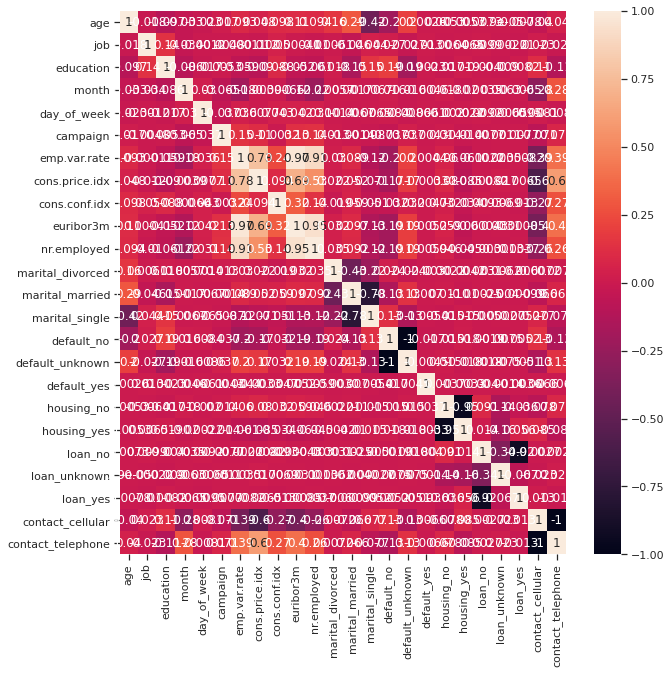

In [72]:
raw.drop('housing_unknown', axis=1, inplace=True)
plt.figure(figsize=(10,10))
sns.heatmap(raw.corr(), annot=True)
plt.show()

##Split to x and y


Memisahkan data raw ke dalam data fitur (x) dan target (y)

In [73]:
y = raw.iloc[:, 11]
raw.drop('y', axis=1, inplace=True)
x = raw
x.head

<bound method NDFrame.head of        age  job  education  ...  loan_yes  contact_cellular  contact_telephone
0       56    3          0  ...         0                 0                  1
1       57    7          3  ...         0                 0                  1
2       37    7          3  ...         0                 0                  1
3       40    0          1  ...         0                 0                  1
4       56    7          3  ...         1                 0                  1
...    ...  ...        ...  ...       ...               ...                ...
41181   37    0          6  ...         0                 1                  0
41182   29   10          0  ...         0                 1                  0
41184   46    1          5  ...         0                 1                  0
41185   56    5          6  ...         0                 1                  0
41186   44    9          5  ...         0                 1                  0

[40339 rows x 24 colu

Membagi x dan y ke dalam porsi 80:20 untuk kepentingan training/fitting model klasifikasi/regresi dan kepentingan prediksi/testing

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print({x_train.shape},{y_train.shape},{x_test.shape},{y_test.shape})

{(32271, 24)} {(32271,)} {(8068, 24)} {(8068,)}


#Model: Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

prediksi dengan data testing

In [78]:
y_pred = log_reg_model.predict(x_test)

In [82]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[7120   74]
 [ 756  118]]


In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7194
         yes       0.61      0.14      0.22       874

    accuracy                           0.90      8068
   macro avg       0.76      0.56      0.58      8068
weighted avg       0.87      0.90      0.87      8068



#Model: K-Nearest Neighbors

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [91]:
y_pred = knn_model.predict(x_test)

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7194
         yes       0.38      0.16      0.23       874

    accuracy                           0.88      8068
   macro avg       0.64      0.57      0.58      8068
weighted avg       0.85      0.88      0.86      8068



#Model: SVM

##dengan model svm.SVC

In [94]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', gamma='auto')
svm_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [95]:
y_pred = svm_model.predict(x_test)

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7194
         yes       0.00      0.00      0.00       874

    accuracy                           0.89      8068
   macro avg       0.45      0.50      0.47      8068
weighted avg       0.80      0.89      0.84      8068



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## dengan model svm.SVCLinear
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
*digunakan untuk dataset besar

In [97]:
from sklearn.svm import LinearSVC
svmlinear_model = LinearSVC(random_state=0, tol=1e-5)
svmlinear_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [101]:
y_pred = svmlinear_model.predict(x_test)

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7194
         yes       0.59      0.09      0.15       874

    accuracy                           0.89      8068
   macro avg       0.74      0.54      0.55      8068
weighted avg       0.87      0.89      0.86      8068



#Model: Decision Tree

In [103]:
#@title Default title text
from sklearn import tree
dectree_model = tree.DecisionTreeClassifier()
dectree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(116.54496106905087, 214.14545454545456, 'X[10] <= 0.469\ngini = 0.191\nsamples = 32271\nvalue = [28819, 3452]'),
 Text(54.40412671759902, 207.55636363636364, 'X[23] <= 0.5\ngini = 0.493\nsamples = 3510\nvalue = [1960, 1550]'),
 Text(36.074506254405016, 200.96727272727273, 'X[6] <= 0.219\ngini = 0.498\nsamples = 2990\nvalue = [1589, 1401]'),
 Text(16.31934727116679, 194.37818181818182, 'X[9] <= 0.024\ngini = 0.484\nsamples = 1840\nvalue = [1087, 753]'),
 Text(6.766029101491452, 187.7890909090909, 'X[1] <= 4.5\ngini = 0.5\nsamples = 443\nvalue = [221, 222]'),
 Text(3.937462349945435, 181.2, 'X[9] <= 0.018\ngini = 0.493\nsamples = 250\nvalue = [140, 110]'),
 Text(2.075297198981448, 174.6109090909091, 'X[4] <= 2.5\ngini = 0.493\nsamples = 107\nvalue = [47, 60]'),
 Text(1.4225041833393963, 168.0218181818182, 'X[1] <= 0.5\ngini = 0.497\nsamples = 67\nvalue = [36, 31]'),
 Text(0.8963724990905785, 161.43272727272728, 'X[4] <= 1.5\ngini = 0.488\nsamples = 38\nvalue = [16, 22]'),
 Text(0.6

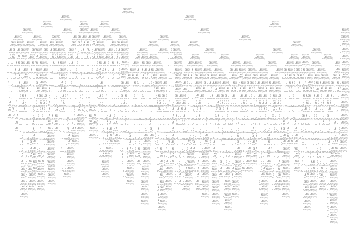

In [106]:
tree.plot_tree(dectree_model)

In [107]:
y_pred = dectree_model.predict(x_test)

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.90      0.91      7194
         yes       0.29      0.33      0.31       874

    accuracy                           0.84      8068
   macro avg       0.60      0.62      0.61      8068
weighted avg       0.85      0.84      0.84      8068



#Model: Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
forest_clf_model = RandomForestClassifier(max_depth=2, random_state=0)
forest_clf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [114]:
y_pred = forest_clf_model.predict(x_test)

In [119]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7194
         yes       0.00      0.00      0.00       874

    accuracy                           0.89      8068
   macro avg       0.45      0.50      0.47      8068
weighted avg       0.80      0.89      0.84      8068



#Model: Naive Bayes

##Gaussian NB

In [123]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [124]:
y_pred = nb_model.predict(x_test)

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.96      0.61      0.74      7194
         yes       0.19      0.77      0.31       874

    accuracy                           0.63      8068
   macro avg       0.57      0.69      0.53      8068
weighted avg       0.87      0.63      0.70      8068



##Multinomial NB

In [126]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [127]:
y_pred = nb_model.predict(x_test)

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7194
         yes       0.42      0.05      0.09       874

    accuracy                           0.89      8068
   macro avg       0.66      0.52      0.52      8068
weighted avg       0.84      0.89      0.85      8068



##Complement NB

In [129]:
from sklearn.naive_bayes import ComplementNB
nb_model = ComplementNB()
nb_model.fit(x_train, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [130]:
y_pred = nb_model.predict(x_test)

In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.95      0.65      0.77      7194
         yes       0.20      0.72      0.31       874

    accuracy                           0.66      8068
   macro avg       0.58      0.69      0.54      8068
weighted avg       0.87      0.66      0.72      8068



##Bernoulli NB

In [132]:
from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB()
nb_model.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [133]:
y_pred = nb_model.predict(x_test)

In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.90      0.97      0.94      7194
         yes       0.42      0.15      0.22       874

    accuracy                           0.89      8068
   macro avg       0.66      0.56      0.58      8068
weighted avg       0.85      0.89      0.86      8068

